# BAN 6800 Module 4 Assignment
# Business Analytics Model


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import os
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)


In [2]:
# Step 2: Load Dataset
data = pd.read_csv("bank_marketing_cleaned.csv")
print("Data Shape:", data.shape)
print("Target Distribution:\n", data['response_binary'].value_counts())

Data Shape: (41176, 25)
Target Distribution:
 response_binary
0    36537
1     4639
Name: count, dtype: int64


In [3]:
 
# Step 3: Separate Features and Target
target = 'response_binary'
X = data.drop(columns=[target])
y = data[target]
 
# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [4]:
# Step 4: Encode and Scale
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

In [5]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)
print("Train Class Distribution:\n", y_train.value_counts())
print("Test Class Distribution:\n", y_test.value_counts())

Train Class Distribution:
 response_binary
0    25576
1     3247
Name: count, dtype: int64
Test Class Distribution:
 response_binary
0    10961
1     1392
Name: count, dtype: int64


In [6]:
# Step 6: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

In [7]:
# Step 7: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [8]:
# Step 8: Evaluate Models
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
 
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
 
# Create directories for outputs
os.makedirs("figures", exist_ok=True)
os.makedirs("artifacts", exist_ok=True)


Logistic Regression Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10961
           1       1.00      1.00      1.00      1392

    accuracy                           1.00     12353
   macro avg       1.00      1.00      1.00     12353
weighted avg       1.00      1.00      1.00     12353


Random Forest Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10961
           1       1.00      1.00      1.00      1392

    accuracy                           1.00     12353
   macro avg       1.00      1.00      1.00     12353
weighted avg       1.00      1.00      1.00     12353



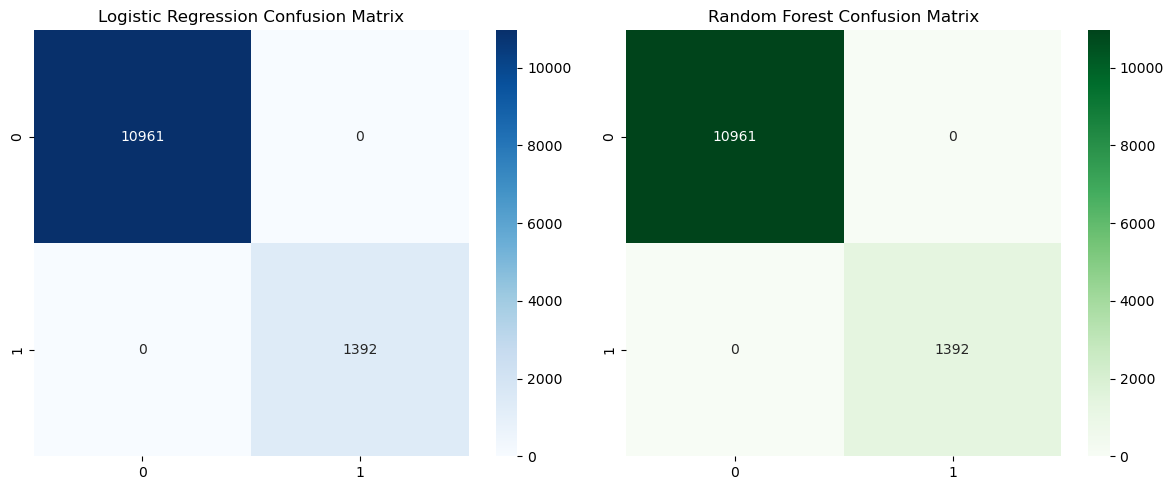

In [9]:
# Step 9: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.savefig("figures/confusion_matrices.png", dpi=300)
plt.show()

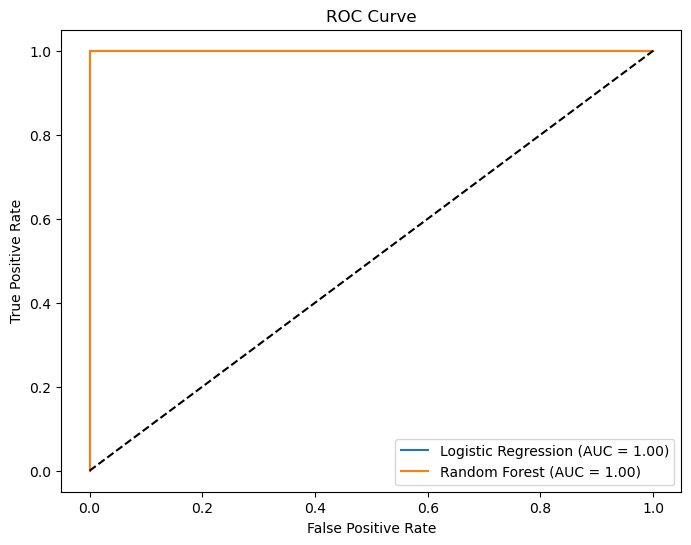

In [10]:
# Step 10: ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig("figures/roc_curve.png", dpi=300)
plt.show()

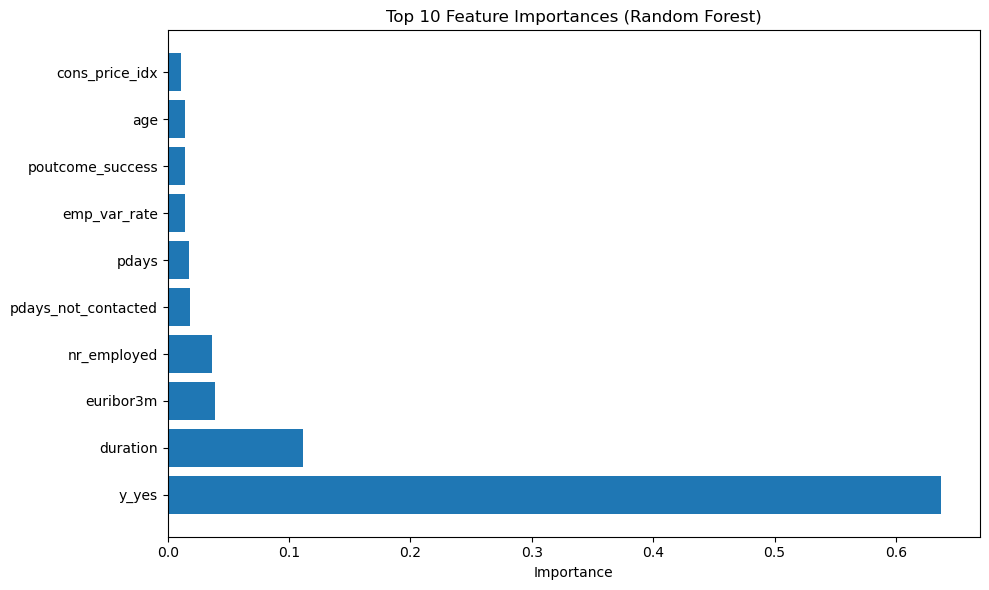

In [11]:
# Step 11: Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:][::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_encoded.columns[i] for i in indices])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.savefig("figures/rf_feature_importance.png", dpi=300)
plt.show()

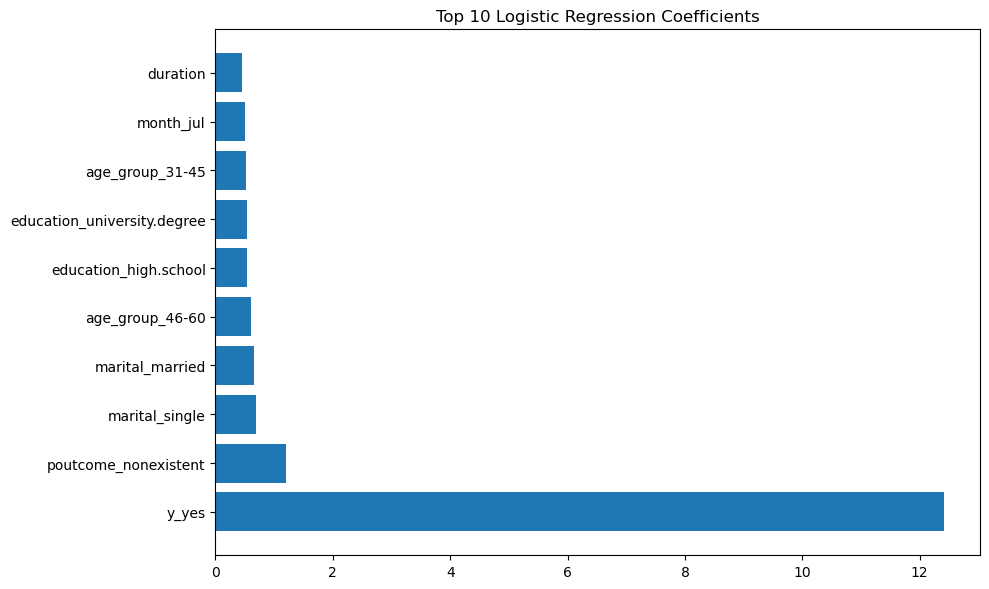

In [12]:
# Step 12: Logistic Regression Coefficients
coefficients = pd.Series(log_reg.coef_[0], index=X_encoded.columns)
top_coeffs = coefficients.abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_coeffs.index, top_coeffs.values)
plt.title('Top 10 Logistic Regression Coefficients')
plt.tight_layout()
plt.savefig("figures/logreg_coefficients.png", dpi=300)
plt.show()

In [13]:
# Step 13: Save Artifacts for Deployment
joblib.dump(log_reg, "artifacts/model_logreg.joblib")
joblib.dump(rf, "artifacts/model_rf.joblib")
joblib.dump(scaler, "artifacts/scaler.joblib")
 
schema = {
    "train_columns": X_encoded.columns.tolist(),
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "target": target,
    "random_state": 42
}
with open("artifacts/schema.json", "w") as f:
    json.dump(schema, f, indent=2)
 
metrics_summary = {
    "logreg": {
        "accuracy": float(accuracy_score(y_test, y_pred_log)),
        "precision": float(precision_score(y_test, y_pred_log)),
        "recall": float(recall_score(y_test, y_pred_log)),
        "f1": float(f1_score(y_test, y_pred_log)),
        "roc_auc": float(roc_auc_log)
    },
    "random_forest": {
        "accuracy": float(accuracy_score(y_test, y_pred_rf)),
        "precision": float(precision_score(y_test, y_pred_rf)),
        "recall": float(recall_score(y_test, y_pred_rf)),
        "f1": float(f1_score(y_test, y_pred_rf)),
        "roc_auc": float(roc_auc_rf)
    }
}
with open("artifacts/metrics.json", "w") as f:
    json.dump(metrics_summary, f, indent=2)
 
print("✅ Notebook completed: Models saved in ./artifacts and figures in ./figures")


✅ Notebook completed: Models saved in ./artifacts and figures in ./figures
